# NBA MVP Predictor

*How can we predict the NBA MVP given traditional and advanced statistics?*

## Objective

*The objective of this data analysis project is to develop a predictive model for identifying the most likely candidate for the NBA Most Valuable Player (MVP) award. By analyzing historical player performance data, team statistics, and other relevant factors, the goal is to create a robust and accurate algorithm that can forecast the MVP winner for the current NBA season. This model aims to provide insights into the key metrics that influence MVP selection and to enhance the understanding of what makes an MVP-caliber season.*

## Setup

#### Important libraries to be used

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

## Obtaining the data

#### Set the timeframe

In [2]:
# We are gonna start in 1980 because that is when the 3 point line was introduced.
# Steals and blocks were also recorded (starting in 1974).
years = list(range(1980, 2025))

#### Set url

In [1]:
# We will obtain MVP voting data first
base_url = "https://www.basketball-reference.com/awards/awards_{}.html"

#### Request data from site

In [5]:
# Request the data from basketball-reference for each year and save each year.
# Use time to comply with site's use of data terms. 
for year in years:
    url = base_url.format(year)
    data = requests.get(url)
    data.encoding = "utf-8"
    
    with open ("mvp/{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(data.text)

    time.sleep(5)

#### Save data into a dataframe

In [6]:
# Extract MVP data for each year and read into pandas
dfs = []
for year in years:
    with open("mvp/{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="over_header").decompose()
    mvp_table = soup.find(id="mvp")
    mvp = pd.read_html(str(mvp_table))[0]
    mvp["Year"] = year
    dfs.append(mvp)

In [7]:
mvps = pd.concat(dfs)

In [8]:
mvps

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Kareem Abdul-Jabbar,32,LAL,147.0,147.0,221,0.665,82,38.3,...,10.8,4.5,1.0,3.4,0.604,0.000,0.765,14.8,0.227,1980
1,2,Julius Erving,29,PHI,31.5,31.5,221,0.143,78,36.1,...,7.4,4.6,2.2,1.8,0.519,0.200,0.787,12.5,0.213,1980
2,3,George Gervin,27,SAS,19.0,19.0,221,0.086,78,37.6,...,5.2,2.6,1.4,1.0,0.528,0.314,0.852,10.6,0.173,1980
3,4,Larry Bird,23,BOS,15.0,15.0,221,0.068,82,36.0,...,10.4,4.5,1.7,0.6,0.474,0.406,0.836,11.2,0.182,1980
4,5T,Tiny Archibald,31,BOS,2.0,2.0,221,0.009,80,35.8,...,2.5,8.4,1.3,0.1,0.482,0.222,0.830,8.9,0.148,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,Jalen Brunson,27,NYK,0.0,142.0,990,0.143,77,35.4,...,3.6,6.7,0.9,0.2,0.479,0.401,0.847,11.2,0.198,2024
5,6,Jayson Tatum,25,BOS,0.0,86.0,990,0.087,74,35.7,...,8.1,4.9,1.0,0.6,0.471,0.376,0.833,10.4,0.189,2024
6,7,Anthony Edwards,22,MIN,0.0,18.0,990,0.018,79,35.1,...,5.4,5.1,1.3,0.5,0.461,0.357,0.836,7.5,0.130,2024
7,8,Domantas Sabonis,27,SAC,0.0,3.0,990,0.003,82,35.7,...,13.7,8.2,0.9,0.6,0.594,0.379,0.704,12.6,0.206,2024


In [9]:
mvps.to_csv("mvps.csv")

#### Next, let's get player data

In [27]:
# Requests won't work, so we have to try a different method using Selenium
path = "C:/Users/Tavar/Downloads/chromedriver"
driver = webdriver.Chrome()

#### Set the url

In [28]:
player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

#### Request data from site 

In [31]:
for year in years:
    url_1 = player_stats_url.format(year)
    driver.get(url_1)
    driver.execute_script("window.scrollTo(1,10000)")
    time.sleep(5)
    html = driver.page_source

    with open ("player/{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(html)

#### Save data into dataframe

In [34]:
dfs = []
for year in years:
    with open("player/{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="thead").decompose()
    player_table = soup.find(id="per_game_stats")
    player = pd.read_html(str(player_table))[0]
    player["Year"] = year
    dfs.append(player)

In [36]:
players = pd.concat(dfs)

In [38]:
players

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Kareem Abdul-Jabbar*,C,32,LAL,82,NaN,38.3,10.2,16.9,...,2.3,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8,1980
1,2,Tom Abernethy,PF,25,GSW,67,NaN,18.2,2.3,4.7,...,0.9,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4,1980
2,3,Alvan Adams,C,25,PHO,75,NaN,28.9,6.2,11.7,...,2.1,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9,1980
3,4,Tiny Archibald*,PG,31,BOS,80,80,35.8,4.8,9.9,...,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1,1980
4,5,Dennis Awtrey,C,31,CHI,26,6,21.5,1.0,2.3,...,1.1,3.3,4.4,1.5,0.5,0.6,1.0,2.5,3.3,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,...,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3,2024
758,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,...,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7,2024
759,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,...,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6,2024
760,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,...,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8,2024


In [40]:
players.to_csv("players.csv")

#### Advanced data

In [41]:
# Same process as obtaining player data
advanced_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_advanced.html"

In [42]:
for year in years:
    url_1 = advanced_stats_url.format(year)
    driver.get(url_1)
    driver.execute_script("window.scrollTo(1,10000)")
    time.sleep(5)
    html = driver.page_source

    with open ("advanced/{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(html)

In [43]:
dfs = []
for year in years:
    with open("advanced/{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="thead").decompose()
    advanced_table = soup.find(id="advanced_stats")
    advanced = pd.read_html(str(advanced_table))[0]
    advanced["Year"] = year
    dfs.append(advanced)

In [44]:
advanced_stats = pd.concat(dfs)

In [45]:
advanced_stats

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Year
0,1,Kareem Abdul-Jabbar*,C,32,LAL,82,3143,25.3,.639,.001,...,9.5,5.3,14.8,.227,NaN,4.8,2.4,7.2,7.3,1980
1,2,Tom Abernethy,PF,25,GSW,67,1222,11.0,.511,.003,...,1.2,0.8,2.0,.080,NaN,-1.0,-0.2,-1.2,0.2,1980
2,3,Alvan Adams,C,25,PHO,75,2168,19.2,.571,.002,...,3.1,3.9,7.0,.155,NaN,1.7,1.9,3.6,3.1,1980
3,4,Tiny Archibald*,PG,31,BOS,80,2864,15.3,.574,.023,...,5.9,2.9,8.9,.148,NaN,1.4,-0.3,1.1,2.3,1980
4,5,Dennis Awtrey,C,31,CHI,26,560,7.4,.524,.000,...,0.1,0.5,0.6,.053,NaN,-2.3,0.9,-1.4,0.1,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,568,Thaddeus Young,PF,35,PHO,10,89,15.1,.515,.048,...,0.1,0.1,0.3,.137,NaN,-1.5,0.6,-0.9,0.0,2024
758,569,Trae Young,PG,25,ATL,54,1942,20.3,.585,.465,...,4.0,0.6,4.6,.114,NaN,4.9,-2.3,2.6,2.2,2024
759,570,Omer Yurtseven,C,25,UTA,48,545,15.0,.565,.130,...,0.3,0.4,0.7,.062,NaN,-1.6,-1.5,-3.0,-0.1,2024
760,571,Cody Zeller,C,31,NOP,43,320,12.8,.483,.048,...,0.4,0.4,0.8,.124,NaN,-2.9,0.3,-2.6,0.0,2024


In [46]:
advanced_stats.to_csv("advanced.csv")

#### Team stats

In [47]:
# Same process as obtaining MVP data
team_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_standings.html"

In [48]:
for year in years:
    url_2 = team_stats_url.format(year)
    data = requests.get(url_2)
    response.encoding = "utf-8"

    with open ("team/{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(data.text)

    time.sleep(5)

In [49]:
dfs = []
for year in years:
    with open("team/{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="thead").decompose()
    team_table = soup.find(id="divs_standings_E")
    team = pd.read_html(str(team_table))[0]
    team["Year"] = year
    team["Team"] = team["Eastern Conference"]
    del team["Eastern Conference"]
    dfs.append(team)

    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="thead").decompose()
    team_table = soup.find(id="divs_standings_W")
    team = pd.read_html(str(team_table))[0]
    team["Year"] = year
    team["Team"] = team["Western Conference"]
    del team["Western Conference"]
    dfs.append(team)

In [50]:
teams = pd.concat(dfs)

In [51]:
teams

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,61,21,.744,—,113.5,105.7,7.37,1980,Boston Celtics*
1,59,23,.720,2.0,109.1,104.9,4.04,1980,Philadelphia 76ers*
2,39,43,.476,22.0,107.0,109.5,-2.27,1980,Washington Bullets*
3,39,43,.476,22.0,114.0,115.1,-0.96,1980,New York Knicks
4,34,48,.415,27.0,108.3,109.5,-0.98,1980,New Jersey Nets
...,...,...,...,...,...,...,...,...,...
13,50,32,.610,—,117.9,115.6,2.30,2024,Dallas Mavericks*
14,49,33,.598,1.0,115.1,110.7,4.46,2024,New Orleans Pelicans*
15,41,41,.500,9.0,114.3,113.2,1.24,2024,Houston Rockets
16,27,55,.329,23.0,105.8,112.8,-6.57,2024,Memphis Grizzlies


In [52]:
teams.to_csv("teams.csv")

## Data Cleaning

In [10]:
mvps = pd.read_csv("mvps.csv")

In [11]:
mvps

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,0,1,Kareem Abdul-Jabbar,32,LAL,147.0,147.0,221,0.665,82,...,10.8,4.5,1.0,3.4,0.604,0.000,0.765,14.8,0.227,1980
1,1,2,Julius Erving,29,PHI,31.5,31.5,221,0.143,78,...,7.4,4.6,2.2,1.8,0.519,0.200,0.787,12.5,0.213,1980
2,2,3,George Gervin,27,SAS,19.0,19.0,221,0.086,78,...,5.2,2.6,1.4,1.0,0.528,0.314,0.852,10.6,0.173,1980
3,3,4,Larry Bird,23,BOS,15.0,15.0,221,0.068,82,...,10.4,4.5,1.7,0.6,0.474,0.406,0.836,11.2,0.182,1980
4,4,5T,Tiny Archibald,31,BOS,2.0,2.0,221,0.009,80,...,2.5,8.4,1.3,0.1,0.482,0.222,0.830,8.9,0.148,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,4,5,Jalen Brunson,27,NYK,0.0,142.0,990,0.143,77,...,3.6,6.7,0.9,0.2,0.479,0.401,0.847,11.2,0.198,2024
715,5,6,Jayson Tatum,25,BOS,0.0,86.0,990,0.087,74,...,8.1,4.9,1.0,0.6,0.471,0.376,0.833,10.4,0.189,2024
716,6,7,Anthony Edwards,22,MIN,0.0,18.0,990,0.018,79,...,5.4,5.1,1.3,0.5,0.461,0.357,0.836,7.5,0.130,2024
717,7,8,Domantas Sabonis,27,SAC,0.0,3.0,990,0.003,82,...,13.7,8.2,0.9,0.6,0.594,0.379,0.704,12.6,0.206,2024


#### Remove columns

In [12]:
mvps = mvps[['Player', 'Year', 'Pts Won', 'Pts Max', 'Share',]]

In [13]:
mvps.head()

,Player,Year,Pts Won,Pts Max,Share
0,Kareem Abdul-Jabbar,1980,147.0,221,0.665
1,Julius Erving,1980,31.5,221,0.143
2,George Gervin,1980,19.0,221,0.086
3,Larry Bird,1980,15.0,221,0.068
4,Tiny Archibald,1980,2.0,221,0.009


In [14]:
players = pd.read_csv("players.csv")

In [15]:
players

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Kareem Abdul-Jabbar*,C,32,LAL,82,NaN,38.3,10.2,...,2.3,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8,1980
1,1,2,Tom Abernethy,PF,25,GSW,67,NaN,18.2,2.3,...,0.9,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4,1980
2,2,3,Alvan Adams,C,25,PHO,75,NaN,28.9,6.2,...,2.1,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9,1980
3,3,4,Tiny Archibald*,PG,31,BOS,80,80,35.8,4.8,...,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1,1980
4,4,5,Dennis Awtrey,C,31,CHI,26,6,21.5,1.0,...,1.1,3.3,4.4,1.5,0.5,0.6,1.0,2.5,3.3,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24777,757,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,...,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3,2024
24778,758,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,...,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7,2024
24779,759,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,...,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6,2024
24780,760,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,...,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8,2024


#### Remove column

In [16]:
del players["Unnamed: 0"]

In [17]:
players.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Kareem Abdul-Jabbar*,C,32,LAL,82,NaN,38.3,10.2,16.9,...,2.3,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8,1980
1,2,Tom Abernethy,PF,25,GSW,67,NaN,18.2,2.3,4.7,...,0.9,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4,1980
2,3,Alvan Adams,C,25,PHO,75,NaN,28.9,6.2,11.7,...,2.1,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9,1980
3,4,Tiny Archibald*,PG,31,BOS,80,80,35.8,4.8,9.9,...,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1,1980
4,5,Dennis Awtrey,C,31,CHI,26,6,21.5,1.0,2.3,...,1.1,3.3,4.4,1.5,0.5,0.6,1.0,2.5,3.3,1980


#### Get rid of asterisks

In [18]:
players["Player"] = players["Player"].str.replace("*", "", regex=False)

In [19]:
players.head(50)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Kareem Abdul-Jabbar,C,32,LAL,82,NaN,38.3,10.2,16.9,...,2.3,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8,1980
1,2,Tom Abernethy,PF,25,GSW,67,NaN,18.2,2.3,4.7,...,0.9,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4,1980
2,3,Alvan Adams,C,25,PHO,75,NaN,28.9,6.2,11.7,...,2.1,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9,1980
3,4,Tiny Archibald,PG,31,BOS,80,80,35.8,4.8,9.9,...,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1,1980
4,5,Dennis Awtrey,C,31,CHI,26,6,21.5,1.0,2.3,...,1.1,3.3,4.4,1.5,0.5,0.6,1.0,2.5,3.3,1980
5,6,Gus Bailey,SG,28,WSB,20,NaN,9.0,0.8,1.8,...,0.3,1.1,1.4,1.3,0.4,0.2,0.6,0.9,1.9,1980
6,7,James Bailey,PF,22,SEA,67,NaN,10.8,1.8,4.0,...,1.1,1.9,2.9,0.4,0.3,0.8,1.2,1.7,4.7,1980
7,8,Greg Ballard,SF,25,WSB,82,NaN,29.7,6.6,13.4,...,2.9,4.9,7.8,1.9,1.1,0.4,1.6,2.4,15.6,1980
8,9,Mike Bantom,SF,28,IND,77,NaN,30.3,5.0,9.9,...,2.5,3.4,5.9,3.6,1.1,0.6,2.5,3.5,11.8,1980
9,10,Marvin Barnes,PF,27,SDC,20,NaN,14.4,1.2,3.0,...,1.7,2.2,3.9,0.9,0.3,0.6,0.9,2.6,3.2,1980


#### Account for players who played for multiple teams in a season

In [20]:
# The team TOT doesn't exist so change it to the team they last played for
# Only keep stats for the whole year, not for each individual team
def single_row(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df["Tm"] == "TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row

In [21]:
players = players.groupby(["Rk", "Year"]).apply(single_row)

In [22]:
players.head(50)

Rk               Player   Pos Age   Tm   G   GS    MP    FG  \
Rk Year                                                                      
1  1980 0       1  Kareem Abdul-Jabbar     C  32  LAL  82  NaN  38.3  10.2   
   1981 370     1  Kareem Abdul-Jabbar     C  33  LAL  80  NaN  37.2  10.5   
   1982 747     1  Kareem Abdul-Jabbar     C  34  LAL  76   76  35.2   9.9   
   1983 1134    1  Kareem Abdul-Jabbar     C  35  LAL  79   79  32.3   9.1   
   1984 1539    1  Kareem Abdul-Jabbar     C  36  LAL  80   80  32.8   9.0   
   1985 1896    1  Kareem Abdul-Jabbar     C  37  LAL  79   79  33.3   9.2   
   1986 2272    1  Kareem Abdul-Jabbar     C  38  LAL  79   79  33.3   9.6   
   1987 2666    1  Kareem Abdul-Jabbar     C  39  LAL  78   78  31.3   7.2   
   1988 3059    1  Kareem Abdul-Jabbar     C  40  LAL  80   80  28.9   6.0   
   1989 3500    1  Kareem Abdul-Jabbar     C  41  LAL  74   74  22.9   4.2   
   1990 3954    1           Mark Acres     C  27  ORL  80   50  21.1   1.7   
   1991 4431    1       Alaa Abdelnaby    PF  22  POR  43    0   6.7   1.3   
   1992 4890    1       Alaa Abdelnaby    PF  23  POR  71    1  13.2   2.5   
   1993 5366    1       Alaa Abdelnaby    PF  24  BOS  75   52  17.5   3.3   
   1994 5833    1       Alaa Abdelnaby    PF  25  BOS  13    0  12.2   1.8   
   1995 6333    1       Alaa Abdelnaby    PF  26  PHI  54    0   9.4   2.2   
   1996 6804    1   Mahmoud Abdul-Rauf    PG  26  DEN  57   53  35.6   7.3   
   1997 7369    1   Mahmoud Abdul-Rauf    PG  27  SAC  75   51  28.4   5.5   
   1998 7964    1   Mahmoud Abdul-Rauf    PG  28  SAC  31    0  17.1   3.3   
   1999 8531    1    Tariq Abdul-Wahad    SG  24  SAC  49   49  24.6   3.6   
   2000 9058    1    Tariq Abdul-Wahad    SG  25  DEN  61   56  25.9   4.5   
   2001 9574    1   Mahmoud Abdul-Rauf    PG  31  VAN  41    0  11.9   2.9   
   2002 10132   1    Tariq Abdul-Wahad    SG  27  DAL  24   12  18.4   2.3   
   2003 10652   1    Tariq Abdul-Wahad    SG  28  DAL  14    0  14.6   1.9   
   2004 11155   1  Shareef Abdur-Rahim    PF  27  POR  85   56  31.6   5.9   
   2005 11761   1  Shareef Abdur-Rahim    PF  28  POR  54   49  34.6   6.2   
   2006 12368   1  Shareef Abdur-Rahim    PF  29  SAC  72   30  27.2   4.6   
   2007 12952   1  Shareef Abdur-Rahim     C  30  SAC  80   45  25.2   3.9   
   2008 13489   1  Shareef Abdur-Rahim    PF  31  SAC   6    0   8.5   0.5   
   2009 14105   1           Alex Acker    SG  26  LAC  25    0   8.0   1.2   
   2010 14708   1        Arron Afflalo    SG  24  DEN  82   75  27.1   3.3   
   2011 15307   1          Jeff Adrien    PF  24  GSW  23    0   8.5   1.0   
   2012 15953   1          Jeff Adrien    PF  25  HOU   8    0   7.9   0.9   
   2013 16526   1           Quincy Acy    PF  22  TOR  29    0  11.8   1.4   
   2014 17121   1           Quincy Acy    SF  23  SAC  63    0  13.4   1.0   
   2015 17755   1           Quincy Acy    PF  24  NYK  68   22  18.9   2.2   
   2016 18429   1           Quincy Acy    PF  25  SAC  59   29  14.8   2.0   
   2017 19029   1         Álex Abrines    SG  23  OKC  68    6  15.5   2.0   
   2018 19647   1         Álex Abrines    SG  24  OKC  75    8  15.1   1.5   
   2019 20336   1         Álex Abrines    SG  25  OKC  31    2  19.0   1.8   
   2020 21069   1         Steven Adams     C  26  OKC  63   63  26.7   4.5   
   2021 21745   1     Precious Achiuwa    PF  21  MIA  61    4  12.1   2.0   
   2022 22475   1     Precious Achiuwa     C  22  TOR  73   28  23.6   3.6   
   2023 23316   1     Precious Achiuwa     C  23  TOR  55   12  20.7   3.6   
   2024 24020   1     Precious Achiuwa  PF-C  24  NYK  74   18  21.9   3.2   
10 1980 9      10        Marvin Barnes    PF  27  SDC  20  NaN  14.4   1.2   
   1981 381    10      Billy Ray Bates    SG  24  POR  77  NaN  20.3   5.7   
   1982 758    10           Gene Banks    SF  22  SAS  80    4  21.3   3.9   
   1983 1145   10         James Bailey    PF  25  HOU  75   39  23.5   5.1   
   1984 1548   10         James Baile

#### Remove indexes

In [23]:
players.index = players.index.droplevel()

In [24]:
players.index = players.index.droplevel()

#### Check to see function worked

In [25]:
# We use George Johnson as an example since there were 2 players named George Johnson that played at the same time
players[players["Player"] == "George Johnson"]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
1676,127,George Johnson,SF,27,IND,81,20,25.6,5.1,10.9,...,1.7,4.0,5.7,2.4,1.0,0.6,2.3,3.2,13.0,1984
2039,128,George Johnson,C,36,NJN,65,0,12.3,0.6,1.2,...,1.1,1.7,2.8,0.3,0.3,1.2,0.6,2.3,1.6,1985
2040,129,George Johnson,SF,28,PHI,55,3,13.7,1.9,4.8,...,0.9,2.1,3.0,0.7,0.6,0.3,0.9,1.8,4.8,1985
1297,130,George Johnson,C,34,ATL,37,0,12.5,0.7,1.5,...,1.2,2.0,3.2,0.5,0.3,1.6,0.5,1.9,1.7,1983
2434,130,George Johnson,C,37,SEA,41,0,6.4,0.3,0.6,...,0.6,0.8,1.5,0.3,0.1,0.9,0.3,1.1,0.9,1986
1298,131,George Johnson,SF,26,IND,82,64,28.0,5.0,10.5,...,2.1,4.5,6.6,2.7,0.9,0.6,3.0,3.4,11.6,1983
2435,131,George Johnson,PF,29,WSB,2,0,3.5,0.5,1.5,...,0.5,0.5,1.0,0.0,0.0,0.0,0.5,0.5,2.0,1986
531,133,George Johnson,C,32,SAS,82,82,23.6,2.0,4.2,...,2.6,4.7,7.3,1.1,0.6,3.4,1.3,3.3,5.0,1981
164,134,George Johnson,C,31,NJN,81,NaN,26.2,3.1,6.7,...,2.4,5.1,7.4,2.1,0.7,3.2,2.5,3.9,7.2,1980
532,134,George Johnson,PF,24,IND,43,NaN,21.6,4.2,9.2,...,2.3,4.2,6.5,2.0,1.1,0.5,2.0,2.8,10.6,1981


#### Combine the player and MVP data

In [26]:
combined = players.merge(mvps, how="outer", on=["Player", "Year"])

In [27]:
combined

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,1,Kareem Abdul-Jabbar,C,32,LAL,82,NaN,38.3,10.2,16.9,...,4.5,1.0,3.4,3.6,2.6,24.8,1980,147.0,221.0,0.665
1,1,Kareem Abdul-Jabbar,C,33,LAL,80,NaN,37.2,10.5,18.2,...,3.4,0.7,2.9,3.1,3.1,26.2,1981,286.0,690.0,0.414
2,1,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,3.0,0.8,2.7,3.0,2.9,23.9,1982,31.0,690.0,0.045
3,1,Kareem Abdul-Jabbar,C,35,LAL,79,79,32.3,9.1,15.5,...,2.5,0.8,2.2,2.5,2.8,21.8,1983,15.0,750.0,0.020
4,1,Kareem Abdul-Jabbar,C,36,LAL,80,80,32.8,9.0,15.5,...,2.6,0.7,1.8,2.8,2.6,21.5,1984,153.0,760.0,0.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19394,99,Chris Chiozza,PG,24,BRK,28,2,14.3,2.0,5.0,...,3.0,0.8,0.1,1.1,1.3,5.1,2020,NaN,NaN,NaN
19395,99,Marquese Chriss,PF,23,GSW,2,0,13.5,2.5,7.0,...,1.0,0.0,1.0,1.0,1.5,6.5,2021,NaN,NaN,NaN
19396,99,Ahmad Caver,SG,25,IND,1,0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2022,NaN,NaN,NaN
19397,99,Mike Conley,PG,35,MIN,67,66,30.3,3.9,9.1,...,6.7,1.1,0.2,1.5,2.1,11.9,2023,NaN,NaN,NaN


#### Fill null values

In [28]:
# Null values for MVP data are because they didn't recieve any votes, so we can just fill with 0
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [29]:
combined

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,1,Kareem Abdul-Jabbar,C,32,LAL,82,NaN,38.3,10.2,16.9,...,4.5,1.0,3.4,3.6,2.6,24.8,1980,147.0,221.0,0.665
1,1,Kareem Abdul-Jabbar,C,33,LAL,80,NaN,37.2,10.5,18.2,...,3.4,0.7,2.9,3.1,3.1,26.2,1981,286.0,690.0,0.414
2,1,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,3.0,0.8,2.7,3.0,2.9,23.9,1982,31.0,690.0,0.045
3,1,Kareem Abdul-Jabbar,C,35,LAL,79,79,32.3,9.1,15.5,...,2.5,0.8,2.2,2.5,2.8,21.8,1983,15.0,750.0,0.020
4,1,Kareem Abdul-Jabbar,C,36,LAL,80,80,32.8,9.0,15.5,...,2.6,0.7,1.8,2.8,2.6,21.5,1984,153.0,760.0,0.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19394,99,Chris Chiozza,PG,24,BRK,28,2,14.3,2.0,5.0,...,3.0,0.8,0.1,1.1,1.3,5.1,2020,0.0,0.0,0.000
19395,99,Marquese Chriss,PF,23,GSW,2,0,13.5,2.5,7.0,...,1.0,0.0,1.0,1.0,1.5,6.5,2021,0.0,0.0,0.000
19396,99,Ahmad Caver,SG,25,IND,1,0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2022,0.0,0.0,0.000
19397,99,Mike Conley,PG,35,MIN,67,66,30.3,3.9,9.1,...,6.7,1.1,0.2,1.5,2.1,11.9,2023,0.0,0.0,0.000


In [30]:
advanced_stats = pd.read_csv("advanced.csv")

In [31]:
advanced_stats

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Year
0,0,1,Kareem Abdul-Jabbar*,C,32,LAL,82,3143,25.3,.639,...,9.5,5.3,14.8,.227,NaN,4.8,2.4,7.2,7.3,1980
1,1,2,Tom Abernethy,PF,25,GSW,67,1222,11.0,.511,...,1.2,0.8,2.0,.080,NaN,-1.0,-0.2,-1.2,0.2,1980
2,2,3,Alvan Adams,C,25,PHO,75,2168,19.2,.571,...,3.1,3.9,7.0,.155,NaN,1.7,1.9,3.6,3.1,1980
3,3,4,Tiny Archibald*,PG,31,BOS,80,2864,15.3,.574,...,5.9,2.9,8.9,.148,NaN,1.4,-0.3,1.1,2.3,1980
4,4,5,Dennis Awtrey,C,31,CHI,26,560,7.4,.524,...,0.1,0.5,0.6,.053,NaN,-2.3,0.9,-1.4,0.1,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24777,757,568,Thaddeus Young,PF,35,PHO,10,89,15.1,.515,...,0.1,0.1,0.3,.137,NaN,-1.5,0.6,-0.9,0.0,2024
24778,758,569,Trae Young,PG,25,ATL,54,1942,20.3,.585,...,4.0,0.6,4.6,.114,NaN,4.9,-2.3,2.6,2.2,2024
24779,759,570,Omer Yurtseven,C,25,UTA,48,545,15.0,.565,...,0.3,0.4,0.7,.062,NaN,-1.6,-1.5,-3.0,-0.1,2024
24780,760,571,Cody Zeller,C,31,NOP,43,320,12.8,.483,...,0.4,0.4,0.8,.124,NaN,-2.9,0.3,-2.6,0.0,2024


#### Remove column

In [32]:
del advanced_stats["Unnamed: 0"]

In [33]:
advanced_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Year
0,1,Kareem Abdul-Jabbar*,C,32,LAL,82,3143,25.3,.639,.001,...,9.5,5.3,14.8,.227,NaN,4.8,2.4,7.2,7.3,1980
1,2,Tom Abernethy,PF,25,GSW,67,1222,11.0,.511,.003,...,1.2,0.8,2.0,.080,NaN,-1.0,-0.2,-1.2,0.2,1980
2,3,Alvan Adams,C,25,PHO,75,2168,19.2,.571,.002,...,3.1,3.9,7.0,.155,NaN,1.7,1.9,3.6,3.1,1980
3,4,Tiny Archibald*,PG,31,BOS,80,2864,15.3,.574,.023,...,5.9,2.9,8.9,.148,NaN,1.4,-0.3,1.1,2.3,1980
4,5,Dennis Awtrey,C,31,CHI,26,560,7.4,.524,.000,...,0.1,0.5,0.6,.053,NaN,-2.3,0.9,-1.4,0.1,1980


#### Get rid of asterisks

In [34]:
advanced_stats["Player"] = advanced_stats["Player"].str.replace("*", "", regex=False)

In [35]:
advanced_stats.head(50)

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Year
0,1,Kareem Abdul-Jabbar,C,32,LAL,82,3143,25.3,.639,.001,...,9.5,5.3,14.8,.227,NaN,4.8,2.4,7.2,7.3,1980
1,2,Tom Abernethy,PF,25,GSW,67,1222,11.0,.511,.003,...,1.2,0.8,2.0,.080,NaN,-1.0,-0.2,-1.2,0.2,1980
2,3,Alvan Adams,C,25,PHO,75,2168,19.2,.571,.002,...,3.1,3.9,7.0,.155,NaN,1.7,1.9,3.6,3.1,1980
3,4,Tiny Archibald,PG,31,BOS,80,2864,15.3,.574,.023,...,5.9,2.9,8.9,.148,NaN,1.4,-0.3,1.1,2.3,1980
4,5,Dennis Awtrey,C,31,CHI,26,560,7.4,.524,.000,...,0.1,0.5,0.6,.053,NaN,-2.3,0.9,-1.4,0.1,1980
5,6,Gus Bailey,SG,28,WSB,20,180,9.3,.467,.029,...,0.0,0.2,0.2,.043,NaN,-3.0,1.3,-1.7,0.1,1980
6,7,James Bailey,PF,22,SEA,67,726,12.3,.495,.000,...,-0.4,1.4,1.0,.063,NaN,-4.2,0.9,-3.3,-0.2,1980
7,8,Greg Ballard,SF,25,WSB,82,2438,18.1,.532,.043,...,4.1,2.8,6.9,.136,NaN,1.9,0.1,2.0,2.5,1980
8,9,Mike Bantom,SF,28,IND,77,2330,13.7,.533,.004,...,2.1,1.9,3.9,.081,NaN,-0.3,-0.5,-0.7,0.7,1980
9,10,Marvin Barnes,PF,27,SDC,20,287,8.2,.432,.000,...,-0.1,0.2,0.1,.019,NaN,-3.8,-0.5,-4.3,-0.2,1980


#### Account for players playing for different teams 

In [36]:
advanced_stats = advanced_stats.groupby(["Rk", "Year"]).apply(single_row)

In [37]:
advanced_stats.head(50)

Rk               Player   Pos Age   Tm   G    MP   PER   TS%  \
Rk Year                                                                       
1  1980 0       1  Kareem Abdul-Jabbar     C  32  LAL  82  3143  25.3  .639   
   1981 370     1  Kareem Abdul-Jabbar     C  33  LAL  80  2976  25.5  .616   
   1982 747     1  Kareem Abdul-Jabbar     C  34  LAL  76  2677  23.4  .608   
   1983 1134    1  Kareem Abdul-Jabbar     C  35  LAL  79  2554  23.6  .619   
   1984 1539    1  Kareem Abdul-Jabbar     C  36  LAL  80  2622  21.3  .608   
   1985 1896    1  Kareem Abdul-Jabbar     C  37  LAL  79  2630  22.9  .628   
   1986 2272    1  Kareem Abdul-Jabbar     C  38  LAL  79  2629  22.7  .603   
   1987 2666    1  Kareem Abdul-Jabbar     C  39  LAL  78  2441  17.9  .597   
   1988 3059    1  Kareem Abdul-Jabbar     C  40  LAL  80  2308  15.8  .570   
   1989 3500    1  Kareem Abdul-Jabbar     C  41  LAL  74  1695  12.9  .511   
   1990 3954    1           Mark Acres     C  27  ORL  80  1691   8.3  .536   
   1991 4431    1       Alaa Abdelnaby    PF  22  POR  43   290  13.1  .499   
   1992 4890    1       Alaa Abdelnaby    PF  23  POR  71   934  13.5  .533   
   1993 5366    1       Alaa Abdelnaby    PF  24  BOS  75  1311  13.2  .551   
   1994 5833    1       Alaa Abdelnaby    PF  25  BOS  13   159   9.2  .485   
   1995 6333    1       Alaa Abdelnaby    PF  26  PHI  54   506  12.6  .519   
   1996 6804    1   Mahmoud Abdul-Rauf    PG  26  DEN  57  2029  18.6  .535   
   1997 7369    1   Mahmoud Abdul-Rauf    PG  27  SAC  75  2131  13.2  .524   
   1998 7964    1   Mahmoud Abdul-Rauf    PG  28  SAC  31   530  10.5  .405   
   1999 8531    1    Tariq Abdul-Wahad    SG  24  SAC  49  1205  11.8  .486   
   2000 9058    1    Tariq Abdul-Wahad    SG  25  DEN  61  1578  13.6  .477   
   2001 9574    1   Mahmoud Abdul-Rauf    PG  31  VAN  41   486  16.7  .514   
   2002 10132   1    Tariq Abdul-Wahad    SG  27  DAL  24   441   9.8  .418   
   2003 10652   1    Tariq Abdul-Wahad    SG  28  DAL  14   204  12.4  .470   
   2004 11155   1  Shareef Abdur-Rahim    PF  27  POR  85  2684  19.9  .557   
   2005 11761   1  Shareef Abdur-Rahim    PF  28  POR  54  1867  18.7  .581   
   2006 12368   1  Shareef Abdur-Rahim    PF  29  SAC  72  1961  17.2  .588   
   2007 12952   1  Shareef Abdur-Rahim     C  30  SAC  80  2015  13.1  .524   
   2008 13489   1  Shareef Abdur-Rahim    PF  31  SAC   6    51   5.5  .317   
   2009 14105   1           Alex Acker    SG  26  LAC  25   199  10.4  .448   
   2010 14708   1        Arron Afflalo    SG  24  DEN  82  2221  10.9  .576   
   2011 15307   1          Jeff Adrien    PF  24  GSW  23   196  11.3  .457   
   2012 15953   1          Jeff Adrien    PF  25  HOU   8    63  11.2  .493   
   2013 16526   1           Quincy Acy    PF  22  TOR  29   342  15.9  .632   
   2014 17121   1           Quincy Acy    SF  23  SAC  63   847  10.1  .520   
   2015 17755   1           Quincy Acy    PF  24  NYK  68  1287  11.9  .533   
   2016 18429   1           Quincy Acy    PF  25  SAC  59   876  14.7  .629   
   2017 19029   1         Álex Abrines    SG  23  OKC  68  1055  10.1  .560   
   2018 19647   1         Álex Abrines    SG  24  OKC  75  1134   9.0  .567   
   2019 20336   1         Álex Abrines    SG  25  OKC  31   588   6.3  .507   
   2020 21069   1         Steven Adams     C  26  OKC  63  1680  20.5  .604   
   2021 21745   1     Precious Achiuwa    PF  21  MIA  61   737  14.2  .550   
   2022 22475   1     Precious Achiuwa     C  22  TOR  73  1725  12.7  .503   
   2023 23316   1     Precious Achiuwa     C  23  TOR  55  1140  15.2  .554   
   2024 24020   1     Precious Achiuwa  PF-C  24  NYK  74  1624  14.6  .545   
10 1980 9      10        Marvin Barnes    PF  27  SDC  20   287   8.2  .432   
   1981 381    10      Billy Ray Bates    SG  24  POR  77  1560  19.3  .537   
   1982 758    10           Gene Banks    SF  22  SAS  80  1700  14.7  .515   
   1983 1145   10         James Bailey    PF  25  HOU  75  1765  

In [38]:
advanced_stats.index = advanced_stats.index.droplevel()

In [40]:
advanced_stats.index = advanced_stats.index.droplevel()

In [41]:
advanced_stats

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Year
0,1,Kareem Abdul-Jabbar,C,32,LAL,82,3143,25.3,.639,.001,...,9.5,5.3,14.8,.227,NaN,4.8,2.4,7.2,7.3,1980
370,1,Kareem Abdul-Jabbar,C,33,LAL,80,2976,25.5,.616,.001,...,9.6,4.6,14.3,.230,NaN,4.7,1.4,6.1,6.1,1981
747,1,Kareem Abdul-Jabbar,C,34,LAL,76,2677,23.4,.608,.002,...,6.9,3.9,10.7,.192,NaN,3.8,1.2,5.0,4.7,1982
1134,1,Kareem Abdul-Jabbar,C,35,LAL,79,2554,23.6,.619,.002,...,8.0,2.9,10.9,.205,NaN,4.0,0.5,4.5,4.2,1983
1539,1,Kareem Abdul-Jabbar,C,36,LAL,80,2622,21.3,.608,.001,...,5.9,3.1,8.9,.163,NaN,2.8,0.2,3.0,3.3,1984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21194,99,Chris Chiozza,PG,24,BRK,28,401,12.0,.499,.514,...,0.0,0.4,0.5,.055,NaN,-1.6,0.5,-1.2,0.1,2020
21871,99,Marquese Chriss,PF,23,GSW,2,27,11.8,.412,.357,...,-0.1,0.1,0.0,-0.030,NaN,-2.4,0.3,-2.1,0.0,2021
22602,99,Ahmad Caver,SG,25,IND,1,1,76.2,1.000,.000,...,0.0,0.0,0.0,1.204,NaN,31.0,5.9,36.9,0.0,2022
23447,99,Mike Conley,PG,35,MIN,67,2029,14.7,.583,.575,...,4.1,1.4,5.5,.130,NaN,1.0,-0.1,0.9,1.5,2023


In [42]:
del advanced_stats["Unnamed: 24"]

In [43]:
advanced_stats

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
0,1,Kareem Abdul-Jabbar,C,32,LAL,82,3143,25.3,.639,.001,...,NaN,9.5,5.3,14.8,.227,4.8,2.4,7.2,7.3,1980
370,1,Kareem Abdul-Jabbar,C,33,LAL,80,2976,25.5,.616,.001,...,NaN,9.6,4.6,14.3,.230,4.7,1.4,6.1,6.1,1981
747,1,Kareem Abdul-Jabbar,C,34,LAL,76,2677,23.4,.608,.002,...,NaN,6.9,3.9,10.7,.192,3.8,1.2,5.0,4.7,1982
1134,1,Kareem Abdul-Jabbar,C,35,LAL,79,2554,23.6,.619,.002,...,NaN,8.0,2.9,10.9,.205,4.0,0.5,4.5,4.2,1983
1539,1,Kareem Abdul-Jabbar,C,36,LAL,80,2622,21.3,.608,.001,...,NaN,5.9,3.1,8.9,.163,2.8,0.2,3.0,3.3,1984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21194,99,Chris Chiozza,PG,24,BRK,28,401,12.0,.499,.514,...,NaN,0.0,0.4,0.5,.055,-1.6,0.5,-1.2,0.1,2020
21871,99,Marquese Chriss,PF,23,GSW,2,27,11.8,.412,.357,...,NaN,-0.1,0.1,0.0,-0.030,-2.4,0.3,-2.1,0.0,2021
22602,99,Ahmad Caver,SG,25,IND,1,1,76.2,1.000,.000,...,NaN,0.0,0.0,0.0,1.204,31.0,5.9,36.9,0.0,2022
23447,99,Mike Conley,PG,35,MIN,67,2029,14.7,.583,.575,...,NaN,4.1,1.4,5.5,.130,1.0,-0.1,0.9,1.5,2023


In [44]:
del advanced_stats["Unnamed: 19"]

In [45]:
advanced_stats

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
0,1,Kareem Abdul-Jabbar,C,32,LAL,82,3143,25.3,.639,.001,...,24.1,9.5,5.3,14.8,.227,4.8,2.4,7.2,7.3,1980
370,1,Kareem Abdul-Jabbar,C,33,LAL,80,2976,25.5,.616,.001,...,26.3,9.6,4.6,14.3,.230,4.7,1.4,6.1,6.1,1981
747,1,Kareem Abdul-Jabbar,C,34,LAL,76,2677,23.4,.608,.002,...,25.6,6.9,3.9,10.7,.192,3.8,1.2,5.0,4.7,1982
1134,1,Kareem Abdul-Jabbar,C,35,LAL,79,2554,23.6,.619,.002,...,24.6,8.0,2.9,10.9,.205,4.0,0.5,4.5,4.2,1983
1539,1,Kareem Abdul-Jabbar,C,36,LAL,80,2622,21.3,.608,.001,...,25.1,5.9,3.1,8.9,.163,2.8,0.2,3.0,3.3,1984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21194,99,Chris Chiozza,PG,24,BRK,28,401,12.0,.499,.514,...,18.1,0.0,0.4,0.5,.055,-1.6,0.5,-1.2,0.1,2020
21871,99,Marquese Chriss,PF,23,GSW,2,27,11.8,.412,.357,...,28.1,-0.1,0.1,0.0,-0.030,-2.4,0.3,-2.1,0.0,2021
22602,99,Ahmad Caver,SG,25,IND,1,1,76.2,1.000,.000,...,42.8,0.0,0.0,0.0,1.204,31.0,5.9,36.9,0.0,2022
23447,99,Mike Conley,PG,35,MIN,67,2029,14.7,.583,.575,...,16.3,4.1,1.4,5.5,.130,1.0,-0.1,0.9,1.5,2023


In [46]:
advanced_stats.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Year'],
      dtype='object')

#### Remove duplicate columns that we already have

In [49]:
del advanced_stats["Player"]
del advanced_stats["Pos"]
del advanced_stats["Age"]   
del advanced_stats["Tm"]
del advanced_stats["G"]
del advanced_stats["MP"]

#### Combine data

In [50]:
combined_2 = combined.merge(advanced_stats, how="outer", on=["Rk", "Year"])

In [51]:
combined_2

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Kareem Abdul-Jabbar,C,32,LAL,82,NaN,38.3,10.2,16.9,...,15.7,24.1,9.5,5.3,14.8,.227,4.8,2.4,7.2,7.3
1,1,Kareem Abdul-Jabbar,C,33,LAL,80,NaN,37.2,10.5,18.2,...,12.8,26.3,9.6,4.6,14.3,.230,4.7,1.4,6.1,6.1
2,1,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,13.3,25.6,6.9,3.9,10.7,.192,3.8,1.2,5.0,4.7
3,1,Kareem Abdul-Jabbar,C,35,LAL,79,79,32.3,9.1,15.5,...,12.6,24.6,8.0,2.9,10.9,.205,4.0,0.5,4.5,4.2
4,1,Kareem Abdul-Jabbar,C,36,LAL,80,80,32.8,9.0,15.5,...,13.5,25.1,5.9,3.1,8.9,.163,2.8,0.2,3.0,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19394,99,Chris Chiozza,PG,24,BRK,28,2,14.3,2.0,5.0,...,18.4,18.1,0.0,0.4,0.5,.055,-1.6,0.5,-1.2,0.1
19395,99,Marquese Chriss,PF,23,GSW,2,0,13.5,2.5,7.0,...,11.3,28.1,-0.1,0.1,0.0,-0.030,-2.4,0.3,-2.1,0.0
19396,99,Ahmad Caver,SG,25,IND,1,0,1.0,1.0,1.0,...,0.0,42.8,0.0,0.0,0.0,1.204,31.0,5.9,36.9,0.0
19397,99,Mike Conley,PG,35,MIN,67,66,30.3,3.9,9.1,...,13.1,16.3,4.1,1.4,5.5,.130,1.0,-0.1,0.9,1.5


In [52]:
combined_2.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [53]:
teams = pd.read_csv("teams.csv")

In [54]:
teams

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,61,21,.744,—,113.5,105.7,7.37,1980,Boston Celtics*
1,1,59,23,.720,2.0,109.1,104.9,4.04,1980,Philadelphia 76ers*
2,2,39,43,.476,22.0,107.0,109.5,-2.27,1980,Washington Bullets*
3,3,39,43,.476,22.0,114.0,115.1,-0.96,1980,New York Knicks
4,4,34,48,.415,27.0,108.3,109.5,-0.98,1980,New Jersey Nets
...,...,...,...,...,...,...,...,...,...,...
1424,13,50,32,.610,—,117.9,115.6,2.30,2024,Dallas Mavericks*
1425,14,49,33,.598,1.0,115.1,110.7,4.46,2024,New Orleans Pelicans*
1426,15,41,41,.500,9.0,114.3,113.2,1.24,2024,Houston Rockets
1427,16,27,55,.329,23.0,105.8,112.8,-6.57,2024,Memphis Grizzlies


In [55]:
teams.head(30)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,61,21,.744,—,113.5,105.7,7.37,1980,Boston Celtics*
1,1,59,23,.720,2.0,109.1,104.9,4.04,1980,Philadelphia 76ers*
2,2,39,43,.476,22.0,107.0,109.5,-2.27,1980,Washington Bullets*
3,3,39,43,.476,22.0,114.0,115.1,-0.96,1980,New York Knicks
4,4,34,48,.415,27.0,108.3,109.5,-0.98,1980,New Jersey Nets
5,5,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1980,Central Division
6,6,50,32,.610,—,104.5,101.6,2.83,1980,Atlanta Hawks*
7,7,41,41,.500,9.0,110.8,110.6,0.27,1980,Houston Rockets*
8,8,41,41,.500,9.0,119.4,119.7,-0.24,1980,San Antonio Spurs*
9,9,37,45,.451,13.0,111.2,111.9,-0.54,1980,Indiana Pacers


#### Get rid of division header

In [56]:
teams = teams[~teams["W"].str.contains("Division")]

In [57]:
teams.head(30)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,61,21,.744,—,113.5,105.7,7.37,1980,Boston Celtics*
1,1,59,23,.720,2.0,109.1,104.9,4.04,1980,Philadelphia 76ers*
2,2,39,43,.476,22.0,107.0,109.5,-2.27,1980,Washington Bullets*
3,3,39,43,.476,22.0,114.0,115.1,-0.96,1980,New York Knicks
4,4,34,48,.415,27.0,108.3,109.5,-0.98,1980,New Jersey Nets
6,6,50,32,.610,—,104.5,101.6,2.83,1980,Atlanta Hawks*
7,7,41,41,.500,9.0,110.8,110.6,0.27,1980,Houston Rockets*
8,8,41,41,.500,9.0,119.4,119.7,-0.24,1980,San Antonio Spurs*
9,9,37,45,.451,13.0,111.2,111.9,-0.54,1980,Indiana Pacers
10,10,37,45,.451,13.0,114.1,113.8,0.43,1980,Cleveland Cavaliers


#### Get rid of asterisks

In [58]:
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)

C:\Users\Tavar\AppData\Local\Temp\ipykernel_14676\3338997264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams["Team"] = teams["Team"].str.replace("*", "", regex=False)


In [59]:
teams.head(5)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,61,21,.744,—,113.5,105.7,7.37,1980,Boston Celtics
1,1,59,23,.720,2.0,109.1,104.9,4.04,1980,Philadelphia 76ers
2,2,39,43,.476,22.0,107.0,109.5,-2.27,1980,Washington Bullets
3,3,39,43,.476,22.0,114.0,115.1,-0.96,1980,New York Knicks
4,4,34,48,.415,27.0,108.3,109.5,-0.98,1980,New Jersey Nets


In [60]:
teams["Team"].unique()

array(['Boston Celtics', 'Philadelphia 76ers', 'Washington Bullets',
       'New York Knicks', 'New Jersey Nets', 'Atlanta Hawks',
       'Houston Rockets', 'San Antonio Spurs', 'Indiana Pacers',
       'Cleveland Cavaliers', 'Detroit Pistons', 'Milwaukee Bucks',
       'Kansas City Kings', 'Denver Nuggets', 'Chicago Bulls',
       'Utah Jazz', 'Los Angeles Lakers', 'Seattle SuperSonics',
       'Phoenix Suns', 'Portland Trail Blazers', 'San Diego Clippers',
       'Golden State Warriors', 'Dallas Mavericks',
       'Los Angeles Clippers', 'Sacramento Kings', 'Charlotte Hornets',
       'Miami Heat', 'Orlando Magic', 'Minnesota Timberwolves',
       'Toronto Raptors', 'Vancouver Grizzlies', 'Washington Wizards',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans'], dtype=object)

In [61]:
combined_2["Tm"].unique()

array(['LAL', 'ORL', 'POR', 'BOS', 'PHI', 'DEN', 'SAC', 'VAN', 'DAL',
       'LAC', 'GSW', 'HOU', 'TOR', 'NYK', 'OKC', 'MIA', 'SDC', 'SAS',
       'UTA', 'CLE', 'CHH', 'NJN', 'NOH', 'CHA', 'MEM', 'WAS', 'IND',
       'NOP', 'BRK', 'CHI', 'MIN', 'WSB', 'DET', 'MIL', 'PHO', 'ATL',
       'SEA', 'CHO', 'KCK', 'NOK'], dtype=object)

#### Map full team names to abbreviations

In [62]:
# Nicknames.csv is a file that already has everything mapped
# Need to do this so data can merge
nicknames = {}

with open("nicknames.csv") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev,name = line.replace("\n", "").split(",")
        nicknames[abbrev] = name

In [63]:
combined_2["Team"] = combined_2["Tm"].map(nicknames)

In [64]:
combined_2.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Team
0,1,Kareem Abdul-Jabbar,C,32,LAL,82,NaN,38.3,10.2,16.9,...,24.1,9.5,5.3,14.8,.227,4.8,2.4,7.2,7.3,Los Angeles Lakers
1,1,Kareem Abdul-Jabbar,C,33,LAL,80,NaN,37.2,10.5,18.2,...,26.3,9.6,4.6,14.3,.230,4.7,1.4,6.1,6.1,Los Angeles Lakers
2,1,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,25.6,6.9,3.9,10.7,.192,3.8,1.2,5.0,4.7,Los Angeles Lakers
3,1,Kareem Abdul-Jabbar,C,35,LAL,79,79,32.3,9.1,15.5,...,24.6,8.0,2.9,10.9,.205,4.0,0.5,4.5,4.2,Los Angeles Lakers
4,1,Kareem Abdul-Jabbar,C,36,LAL,80,80,32.8,9.0,15.5,...,25.1,5.9,3.1,8.9,.163,2.8,0.2,3.0,3.3,Los Angeles Lakers


#### Combine data

In [65]:
stats = combined_2.merge(teams, how="outer", on=["Team", "Year"])

In [66]:
stats

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,VORP,Team,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,1,Kareem Abdul-Jabbar,C,32,LAL,82,NaN,38.3,10.2,16.9,...,7.3,Los Angeles Lakers,7,60,22,.732,—,115.1,109.2,5.40
1,115,Spencer Haywood,PF,30,LAL,76,NaN,20.3,3.8,7.8,...,-0.1,Los Angeles Lakers,7,60,22,.732,—,115.1,109.2,5.40
2,122,Brad Holland,SG,23,LAL,38,NaN,5.2,1.2,2.7,...,0.0,Los Angeles Lakers,7,60,22,.732,—,115.1,109.2,5.40
3,137,Magic Johnson,SG,20,LAL,77,NaN,36.3,6.5,12.3,...,4.8,Los Angeles Lakers,7,60,22,.732,—,115.1,109.2,5.40
4,165,Mark Landsberger,C,24,LAL,77,NaN,19.6,3.2,6.3,...,0.1,Los Angeles Lakers,7,60,22,.732,—,115.1,109.2,5.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19394,71,Chris Childs,PG,33,TOR,77,5,24.1,1.8,4.4,...,-0.3,Toronto Raptors,9,47,35,.573,5.0,97.6,95.4,1.69
19395,73,Keon Clark,PF,25,TOR,81,3,21.2,3.1,6.4,...,0.4,Toronto Raptors,9,47,35,.573,5.0,97.6,95.4,1.69
19396,80,Tyrone Corbin,SF,38,TOR,15,1,7.8,0.6,2.5,...,-0.3,Toronto Raptors,9,47,35,.573,5.0,97.6,95.4,1.69
19397,87,Dell Curry,SG,36,TOR,71,1,13.5,2.3,5.4,...,0.6,Toronto Raptors,9,47,35,.573,5.0,97.6,95.4,1.69


#### Remove column

In [67]:
del stats["Unnamed: 0"]

In [68]:
stats.dtypes

Rk        object
Player    object
Pos       object
Age       object
Tm        object
           ...  
W/L%      object
GB        object
PS/G      object
PA/G      object
SRS       object
Length: 62, dtype: object

#### Convert data types

In [69]:
stats = stats.apply(pd.to_numeric, errors="ignore")

In [70]:
stats.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
           ...   
W/L%      float64
GB         object
PS/G      float64
PA/G      float64
SRS       float64
Length: 62, dtype: object

In [71]:
# GB is still object so let's take a look
stats["GB"].unique()

array(['—', '3.0', '41.0', '12.0', '25.0', '33.0', '24.0', '23.0', '34.0',
       '8.0', '20.0', '35.0', '1.0', '15.0', '10.0', '28.0', '19.0',
       '46.0', '21.0', '16.0', '29.0', '32.0', '40.0', '4.0', '5.0',
       '1.5', '14.0', '39.0', '11.0', '26.0', '9.0', '30.0', '37.0',
       '17.0', '31.0', '18.0', '13.0', '45.0', '36.0', '27.0', '47.0',
       '6.0', '7.0', '2.0', '22.0', '10.5', '42.0', '48.0', '38.0',
       '44.0', '4.5', '43.0', '2.5', '51.0', '3.5', '11.5', '50.0',
       '20.5', '22.5', '25.5', '53.0', '32.5', '12.5', '21.5', '52.0',
       '18.5', '56.0'], dtype=object)

In [72]:
stats["GB"] = stats["GB"].str.replace("—", "0")

In [73]:
stats["GB"].unique()

array(['0', '3.0', '41.0', '12.0', '25.0', '33.0', '24.0', '23.0', '34.0',
       '8.0', '20.0', '35.0', '1.0', '15.0', '10.0', '28.0', '19.0',
       '46.0', '21.0', '16.0', '29.0', '32.0', '40.0', '4.0', '5.0',
       '1.5', '14.0', '39.0', '11.0', '26.0', '9.0', '30.0', '37.0',
       '17.0', '31.0', '18.0', '13.0', '45.0', '36.0', '27.0', '47.0',
       '6.0', '7.0', '2.0', '22.0', '10.5', '42.0', '48.0', '38.0',
       '44.0', '4.5', '43.0', '2.5', '51.0', '3.5', '11.5', '50.0',
       '20.5', '22.5', '25.5', '53.0', '32.5', '12.5', '21.5', '52.0',
       '18.5', '56.0'], dtype=object)

In [74]:
stats["GB"] = pd.to_numeric(stats["GB"])

In [76]:
stats.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
           ...   
W/L%      float64
GB        float64
PS/G      float64
PA/G      float64
SRS       float64
Length: 62, dtype: object

In [77]:
stats.to_csv("stats.csv")

## A little bit of data exploring!

In [78]:
highest_scoring = stats[stats["G"] > 70].sort_values("PTS", ascending=False).head(10)

In [79]:
highest_scoring

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,BPM,VORP,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
16095,141,Michael Jordan,SG,23,CHI,82,82.0,40.0,13.4,27.8,...,10.8,10.6,Chicago Bulls,40,42,0.488,17.0,104.8,103.9,1.26
3685,207,James Harden,PG,29,HOU,78,78.0,36.8,10.8,24.5,...,11.0,9.3,Houston Rockets,53,29,0.646,0.0,113.9,109.1,4.96
16612,59,Kobe Bryant,SG,27,LAL,80,80.0,41.0,12.2,27.2,...,7.6,8.0,Los Angeles Lakers,45,37,0.549,9.0,99.4,96.9,2.53
2100,146,Michael Jordan,SG,24,CHI,82,82.0,40.4,13.0,24.4,...,13.0,12.5,Chicago Bulls,50,32,0.610,4.0,105.0,101.6,3.76
10949,169,Michael Jordan,SG,26,CHI,82,82.0,39.0,12.6,24.0,...,11.2,10.6,Chicago Bulls,55,27,0.671,4.0,109.5,106.2,2.74
5427,98,George Gervin,SG,27,SAS,78,NaN,37.6,13.1,24.9,...,3.9,4.4,San Antonio Spurs,41,41,0.500,9.0,119.4,119.7,-0.24
15881,197,Allen Iverson,PG,30,PHI,72,72.0,43.1,11.3,25.3,...,4.8,5.3,Philadelphia 76ers,38,44,0.463,11.0,99.4,101.3,-2.10
8738,177,Michael Jordan,SG,29,CHI,78,78.0,39.3,12.7,25.7,...,11.2,10.2,Chicago Bulls,57,25,0.695,0.0,105.2,98.9,6.19
9568,163,Michael Jordan,SG,25,CHI,81,81.0,40.2,11.9,22.2,...,11.9,11.4,Chicago Bulls,47,35,0.573,16.0,106.4,105.0,2.13
721,95,George Gervin,SG,29,SAS,79,79.0,35.7,12.6,25.2,...,3.9,4.2,San Antonio Spurs,48,34,0.585,0.0,113.1,110.8,1.79


<Axes: xlabel='Player'>

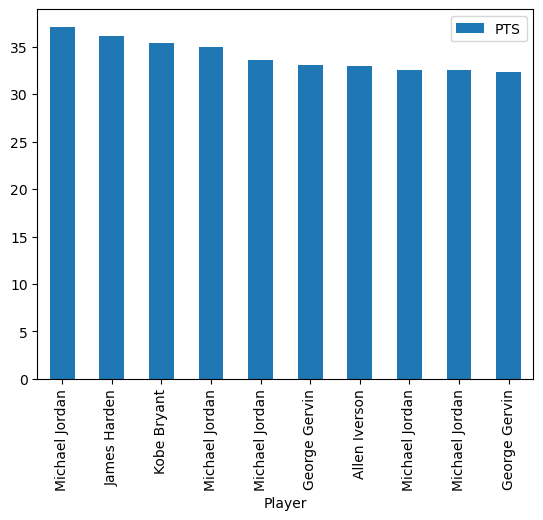

In [80]:
highest_scoring.plot.bar("Player", "PTS")

In [83]:
def highest_pts(df):
    return df.sort_values("PTS", ascending=False).head(1)

In [84]:
highest_scoring = stats.groupby("Year").apply(highest_pts)

<Axes: xlabel='Year'>

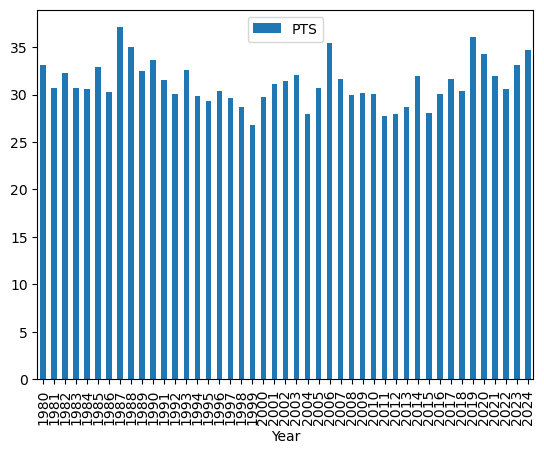

In [85]:
highest_scoring.plot.bar("Year", "PTS")

In [87]:
stats.corr(numeric_only=True)["Share"]

Rk        -0.028847
Age        0.019983
G          0.090185
GS         0.171393
MP         0.167520
FG         0.275360
FGA        0.248796
FG%        0.070541
3P         0.077354
3PA        0.078139
3P%        0.010530
2P         0.274529
2PA        0.250461
2P%        0.063558
eFG%       0.061693
FT         0.320349
FTA        0.320623
FT%        0.045041
ORB        0.120602
DRB        0.223899
TRB        0.200292
AST        0.204497
STL        0.182382
BLK        0.151528
TOV        0.234286
PF         0.075551
PTS        0.288550
Year      -0.015068
Pts Won    0.983978
Pts Max    0.516282
Share      1.000000
PER        0.226596
TS%        0.082141
3PAr      -0.025507
FTr        0.055770
ORB%       0.008773
DRB%       0.085731
TRB%       0.064643
AST%       0.146148
STL%       0.042307
BLK%       0.038164
TOV%      -0.025825
USG%       0.202802
OWS        0.386165
DWS        0.277797
WS         0.380974
WS/48      0.167713
OBPM       0.195030
DBPM       0.102888
BPM        0.193962


<Axes: >

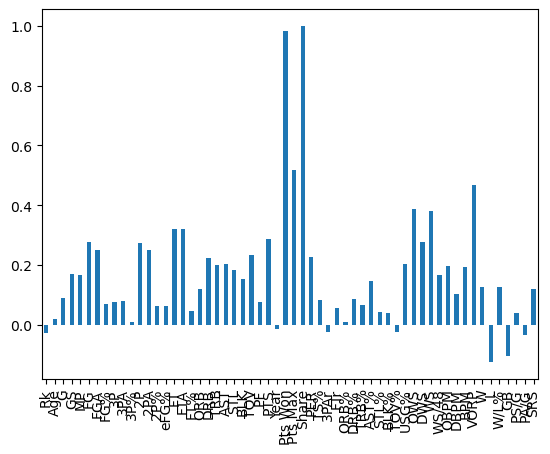

In [89]:
stats.corr(numeric_only=True)["Share"].plot.bar()

#### A tiny bit more cleaning

In [98]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [99]:
pd.isnull(stats).sum()

Rk            0
Player        0
Pos           0
Age           0
Tm            0
G             0
GS          467
MP            0
FG            0
FGA           0
FG%          69
3P            0
3PA           0
3P%        2795
2P            0
2PA           0
2P%         116
eFG%         69
FT            0
FTA           0
FT%         645
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
PER           3
TS%          61
3PAr         69
FTr          69
ORB%          3
DRB%          3
TRB%          3
AST%          3
STL%          3
BLK%          3
TOV%         51
USG%          3
OWS           0
DWS           0
WS            0
WS/48         3
OBPM          0
DBPM          0
BPM           0
VORP          0
Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
dtype: i

In [101]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [102]:
stats[pd.isnull(stats["3P%"])][["Player", "3PA"]]

,Player,3PA
4,Mark Landsberger,0.0
5,Butch Lee,0.0
8,Marty Byrnes,0.0
12,Alan Hardy,0.0
14,Tony Jackson,0.0
...,...,...
19374,Michael Stewart,0.0
19383,Antonio Davis,0.0
19384,Eric Montross,0.0
19386,Mamadou N'Diaye,0.0


In [103]:
stats[pd.isnull(stats["FT%"])][["Player", "FTA"]]

,Player,FTA
14,Tony Jackson,0.0
70,Earl Jones,0.0
84,Jerome Henderson,0.0
271,Oliver Miller,0.0
278,Peter Aluma,0.0
...,...,...
19268,Kirk Penney,0.0
19309,Arnoldas Kulboka,0.0
19329,Naz Mitrou-Long,0.0
19337,Brian Bowen,0.0


In [104]:
stats = stats.fillna(0)

In [105]:
stats.to_csv("stats.csv")

In [6]:
stats = pd.read_csv("stats.csv")

In [7]:
stats.columns

Index(['Unnamed: 0', 'Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Year', 'Pts Won', 'Pts Max', 'Share', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Team', 'W',
       'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS'],
      dtype='object')

In [8]:
del stats["Unnamed: 0"]

In [9]:
stats.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Team', 'W', 'L', 'W/L%',
       'GB', 'PS/G', 'PA/G', 'SRS'],
      dtype='object')

## Machine Learning

#### Set predictors

In [13]:
predictors = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'W', 'L', 'W/L%',
       'GB', 'PS/G', 'PA/G', 'SRS']

#### Set training and testing data

In [14]:
train = stats[stats["Year"] < 2024]

In [15]:
test = stats[(stats["Year"] == 2024) & (stats["G"] > 65)]

#### Run regression

In [20]:
# Alpha value chosen through cross-validation
reg = Ridge(alpha=108)

In [21]:
reg.fit(train[predictors], train["Share"])

Ridge(alpha=108)

In [22]:
predictions = reg.predict(test[predictors])

In [23]:
predictions = pd.DataFrame(predictions, columns=["predictions"], index = test.index)

In [24]:
predictions

,predictions
664,-0.016381
666,0.035856
669,0.008568
670,0.026621
672,-0.006220
...,...
19071,0.018860
19089,0.055906
19091,-0.016151
19092,-0.027761


#### Make results more readable

In [25]:
combination = pd.concat([test[["Player", "Share"]], predictions], axis = 1)

In [26]:
combination

,Player,Share,predictions
664,Precious Achiuwa,0.0,-0.016381
666,Donte DiVincenzo,0.0,0.035856
669,Josh Hart,0.0,0.008568
670,Isaiah Hartenstein,0.0,0.026621
672,Miles McBride,0.0,-0.006220
...,...,...,...
19071,Myles Turner,0.0,0.018860
19089,Bam Adebayo,0.0,0.055906
19091,Haywood Highsmith,0.0,-0.016151
19092,Jaime Jaquez Jr.,0.0,-0.027761


In [27]:
combination.sort_values("Share", ascending = False).head(10)

,Player,Share,predictions
18571,Nikola Jokić,0.935,0.268427
13221,Shai Gilgeous-Alexander,0.646,0.159119
11180,Luka Dončić,0.572,0.215207
4840,Giannis Antetokounmpo,0.194,0.215821
681,Jalen Brunson,0.143,0.119383
10913,Jayson Tatum,0.087,0.110322
1358,Anthony Edwards,0.018,0.075556
15350,Domantas Sabonis,0.003,0.151379
15816,Kevin Durant,0.001,0.094366
15338,De'Aaron Fox,0.000,0.048423


In [28]:
combination = combination.sort_values("Share", ascending = False)
combination["Rk"] = list(range(1, combination.shape[0] + 1))

In [29]:
combination.head(10)

,Player,Share,predictions,Rk
18571,Nikola Jokić,0.935,0.268427,1
13221,Shai Gilgeous-Alexander,0.646,0.159119,2
11180,Luka Dončić,0.572,0.215207,3
4840,Giannis Antetokounmpo,0.194,0.215821,4
681,Jalen Brunson,0.143,0.119383,5
10913,Jayson Tatum,0.087,0.110322,6
1358,Anthony Edwards,0.018,0.075556,7
15350,Domantas Sabonis,0.003,0.151379,8
15816,Kevin Durant,0.001,0.094366,9
15338,De'Aaron Fox,0.000,0.048423,10


In [30]:
combination = combination.sort_values("predictions", ascending = False)
combination["Predicted_Rk"] = list(range(1, combination.shape[0] + 1))

In [31]:
combination.head(10)

,Player,Share,predictions,Rk,Predicted_Rk
18571,Nikola Jokić,0.935,0.268427,1,1
4840,Giannis Antetokounmpo,0.194,0.215821,4,2
11180,Luka Dončić,0.572,0.215207,3,3
13221,Shai Gilgeous-Alexander,0.646,0.159119,2,4
15350,Domantas Sabonis,0.003,0.151379,8,5
10205,LeBron James,0.000,0.126912,93,6
681,Jalen Brunson,0.143,0.119383,5,7
10198,Anthony Davis,0.000,0.117754,155,8
10913,Jayson Tatum,0.087,0.110322,6,9
15816,Kevin Durant,0.001,0.094366,9,10


#### Create a performance/evaluation metric

In [32]:
def find_ap(combination):
    actual = combination.sort_values("Share", ascending = False).head(5)
    predicted = combination.sort_values("predictions", ascending = False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found += 1
            ps.append(found / seen)
        seen += 1
    return sum(ps) / len(ps)

In [33]:
find_ap(combination)

0.9428571428571428

#### Test it over multiple years

In [35]:
years = list(range(1980, 2025))

In [36]:
aps = []
all_predictions = []
for year in years[5:]:
    train = stats[stats["Year"] < year]
    test = stats[stats["Year"] == year]
    reg.fit(train[predictors], train["Share"])
    predictions = reg.predict(test[predictors])
    predictions = pd.DataFrame(predictions, columns=["predictions"], index = test.index)
    combination = pd.concat([test[["Player", "Share"]], predictions], axis = 1)
    all_predictions.append(combination)
    aps.append(find_ap(combination))
sum(aps) / len(aps)

0.810749259496542

#### Create function to organize data

In [37]:
def add_ranks(combination):
    combination = combination.sort_values("Share", ascending = False)
    combination["Rk"] = list(range(1, combination.shape[0] + 1))
    combination = combination.sort_values("predictions", ascending = False)
    combination["Predicted_Rk"] = list(range(1, combination.shape[0] + 1))
    combination["Diff"] = combination["Rk"] - combination["Predicted_Rk"]
    return combination

In [38]:
ranking = add_ranks(all_predictions[1])
ranking[ranking["Rk"] < 6].sort_values("Diff", ascending = False)

,Player,Share,predictions,Rk,Predicted_Rk,Diff
85,Magic Johnson,0.263,0.167861,3,2,1
13237,Larry Bird,0.981,0.246475,1,1,0
7747,Dominique Wilkins,0.522,0.119173,2,5,-3
82,Kareem Abdul-Jabbar,0.173,0.101086,5,8,-3
7340,Hakeem Olajuwon,0.247,0.083696,4,12,-8


#### Create function to test data over multiple years and allow for changes

In [39]:
def backtest(stats, model, year, predictors):
    aps = []
    all_predictions = []
    for year in years[5:]:
        train = stats[stats["Year"] < year]
        test = stats[stats["Year"] == year]
        model.fit(train[predictors], train["Share"])
        predictions = reg.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=["predictions"], index = test.index)
        combination = pd.concat([test[["Player", "Share"]], predictions], axis = 1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps) / len(aps), aps, pd.concat(all_predictions)

In [40]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)

In [41]:
mean_ap

0.810749259496542

#### Some insights

In [42]:
all_predictions[all_predictions["Rk"] <= 5].sort_values("Diff").head(10)

,Player,Share,predictions,Rk,Predicted_Rk,Diff
15398,Glen Rice,0.117,0.041004,5,40,-35
19159,Steve Nash,0.839,0.063225,1,25,-24
3539,Steve Nash,0.739,0.079141,1,23,-22
8333,Peja Stojaković,0.228,0.064190,4,24,-20
7538,Tony Parker,0.274,0.053146,5,24,-19
8556,Chris Paul,0.138,0.063253,5,21,-16
17486,Jason Kidd,0.712,0.083476,2,15,-13
9374,Stephen Curry,0.173,0.088802,5,18,-13
15206,Jason Kidd,0.135,0.049426,5,18,-13
11827,Devin Booker,0.216,0.077386,4,16,-12


In [43]:
pd.concat([pd.Series(reg.coef_), pd.Series(predictors)], axis = 1).sort_values(0, ascending = False)

,0,1
46,0.024905,VORP
15,0.015287,FTA
23,0.010912,TOV
18,0.010403,DRB
16,0.009738,FT%
33,0.007345,TRB%
5,0.006382,FGA
10,0.005297,2P
8,0.003511,3PA
13,0.003446,eFG%
